# RuleTree for regressions

## Initialize the RuleTreeRegressor and train it on your dataset

In [1]:
from ruletree.tree.RuleTreeRegressor import RuleTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the breast cancer dataset
data = load_diabetes()
X = data.data                # Features
y = data.target              # Target labels
feature_names = data.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [2]:
# Initialize the RuleTreeRegressor
# The `prune_useless_leaves` parameter allows pruning of leaves with the same prediction outcome.
rtr = RuleTreeRegressor(
    max_depth=3, 
    criterion='squared_error', 
    prune_useless_leaves=True, 
    random_state=42
)

# Fit the RuleTreeRegressor to the training data
rtr.fit(X_train, y_train)

# Extract the rules as a dictionary using feature names
rules = rtr.get_rules(columns_names=feature_names)


In [3]:
# Print textual rules of trained tree
rtr.print_rules(rules, columns_names=feature_names)

|--- bmi <= 0.005	309
|   |--- s5 <= 0.014	183
|   |   |--- s2 <= 0.091	138
|   |   |    output: 100.82
|   |   |--- s2 > 0.091
|   |   |    output: 241.5
|   |--- s5 > 0.014
|   |   |--- bp <= -0.032	45
|   |   |    output: 114.0
|   |   |--- bp > -0.032
|   |   |    output: 180.71
|--- bmi > 0.005
|   |--- bmi <= 0.073	126
|   |   |--- bp <= 0.003	101
|   |   |    output: 160.05
|   |   |--- bp > 0.003
|   |   |    output: 210.98
|   |--- bmi > 0.073
|   |   |--- s2 <= 0.022	25
|   |   |    output: 292.47
|   |   |--- s2 > 0.022
|   |   |    output: 225.75


In [4]:
y_pred = rtr.predict(X_test)
print('Prediction results\n', y_pred[0:10])

Prediction results
 [180.71428571 210.98275862 180.71428571 210.98275862 100.81617647
 241.5        225.75       210.98275862 114.         160.04651163]


In [5]:
print('MSE result\n', mean_squared_error(y_test, y_pred))

MSE result
 3616.769894653006


In [6]:
# Obtain global feature importances similar to sklearn feature_importances_ of a trained Tree
feture_importances = rtr.compute_feature_importances()
feture_importances

array([0.        , 0.        , 0.70266746, 0.09888023, 0.        ,
       0.06335315, 0.        , 0.        , 0.13509916, 0.        ])

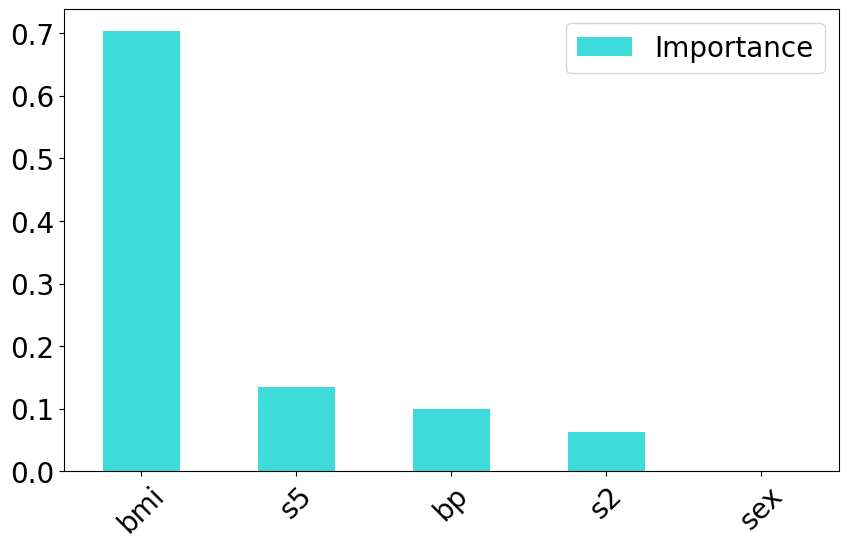

In [7]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6), color = '#3ddbd9')
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)                       
plt.legend(fontsize=20)  
plt.show()

In [8]:
# Get local feature importances similar to https://github.com/andosa/treeinterpreter implementation
# Prediction is the sum of bias and feature contributions
prediction, bias, contributions = rtr.local_interpretation(X_test, joint_contribution= True)

In [9]:
print('First instance analysis')
print(f'Prediction: {prediction[0]}')
print(f'Bias: {bias[0]}')
print(f'Contributions: {contributions[0]}')

First instance analysis
Prediction: 180.71428571428572
Bias: 153.90291262135923
Contributions: {(2,): -35.54772136452863, (2, 8): 47.53369763205828, (2, 3, 8): 14.825396825396837}
